# 데이터 확인
- 결측 및 이상치 확인
- Train의 X, y 변수 시각화
- 상관관계 확인

In [23]:
# Import Library
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb

# Korean
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')


In [3]:
train_df = pd.read_csv('./open/train.csv')

train_x = train_df.filter(regex="X")
train_y = train_df.filter(regex="Y")

In [7]:
# 결측치 확인
print("train_x's # of null : ", sum(train_x.isnull().sum()))
print("train_y's # of null : ", sum(train_y.isnull().sum()))

train_x's # of null :  0
train_y's # of null :  0


In [ ]:
# 이상치 확인
# X_07, 08, 09, 10, 49

def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 3  # 제거 범위 조절 변수
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff

In [22]:
# 무의미 변수 제거(표준편차 0, 데이터 변동 없음)
# X_04, 23, 47, 48
X_tr_std = pd.Series(np.std(train_x))
Del_idx = X_tr_std[X_tr_std==0].index
Del_idx

Index(['X_04', 'X_23', 'X_47', 'X_48'], dtype='object')

In [8]:
train_x.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.0,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,1.0,1.0,16676.913639,130.774557,131.457418,138.587595,127.992420,128.014110,137.884711,128.441119
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,0.0,0.0,8584.427420,5.989845,5.934313,6.469813,5.713153,5.433958,6.552101,5.444245
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,1.0,1.0,3341.830000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,1.0,1.0,13093.930000,126.948571,127.669758,134.475401,124.374525,124.697879,133.744103,125.134713
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,1.0,1.0,15273.330000,130.723378,131.352856,138.525575,128.020010,128.098728,137.900952,128.414501
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,1.0,1.0,17560.180000,134.538998,135.170761,142.702448,131.618662,131.487423,142.073102,131.839764
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,1.0,1.0,114563.630000,162.619458,194.513195,173.438623,152.406630,175.052891,170.155980,155.277538


In [9]:
train_y.describe()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,1.353814,1.057267,1.014002,13.621191,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,0.356223,0.386266,0.361492,2.686632,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,0.017000,0.007000,0.017000,-0.331000,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,1.127500,0.793000,0.769000,11.822000,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,1.349000,1.044000,0.998000,13.837000,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,1.576000,1.300000,1.239000,15.626000,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,4.409000,3.998000,3.756000,98.794000,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


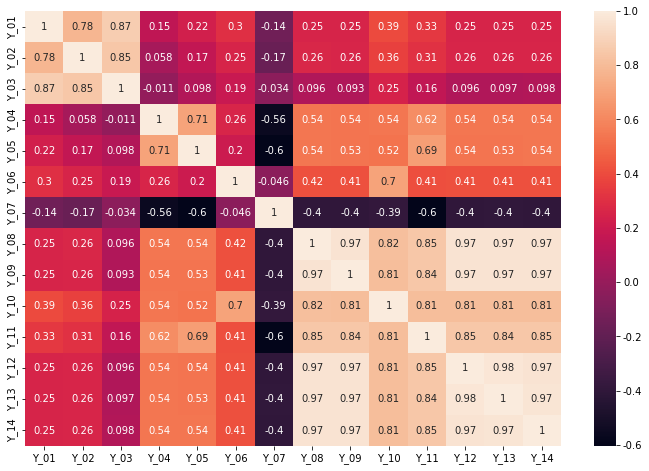

In [27]:
# y 변수 간 상관관계
plt.figure(figsize=(12,8))
sns.heatmap(train_y.corr(), annot=True)
plt.show()

In [29]:
y_group_1 = ['Y_01', 'Y_02', 'Y_03'] # 안테나 게인
y_group_2 = ['Y_04', 'Y_05'] # 
y_group_3 = ['Y_08', 'Y_09', 'Y_12', 'Y_13', 'Y_14']
y_group_4 = ['Y_06', 'Y_10']
y_group_5 = ['Y_07', 'Y_11']

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
Y_01,1.000000,0.779608,0.873430,0.153883,0.224573,0.301886,-0.142804,0.253041,0.248639,0.394000,0.331565,0.251017,0.251515,0.252830
Y_02,0.779608,1.000000,0.846287,0.057526,0.165991,0.253647,-0.167178,0.260813,0.257078,0.364331,0.307481,0.258835,0.259878,0.260435
Y_03,0.873430,0.846287,1.000000,-0.010916,0.098251,0.190563,-0.034255,0.095567,0.093111,0.247422,0.157009,0.095627,0.096892,0.097676
Y_04,0.153883,0.057526,-0.010916,1.000000,0.705194,0.256564,-0.558652,0.541625,0.536003,0.542056,0.623267,0.540831,0.539100,0.542114
Y_05,0.224573,0.165991,0.098251,0.705194,1.000000,0.198836,-0.601760,0.536580,0.532131,0.524548,0.685527,0.535203,0.533051,0.538818
Y_06,0.301886,0.253647,0.190563,0.256564,0.198836,1.000000,-0.045800,0.415276,0.413373,0.699676,0.410842,0.414966,0.414371,0.414623
Y_07,-0.142804,-0.167178,-0.034255,-0.558652,-0.601760,-0.045800,1.000000,-0.401405,-0.398200,-0.385954,-0.604134,-0.400218,-0.396800,-0.400789
Y_08,0.253041,0.260813,0.095567,0.541625,0.536580,0.415276,-0.401405,1.000000,0.966614,0.816150,0.846365,0.967685,0.967492,0.967331
Y_09,0.248639,0.257078,0.093111,0.536003,0.532131,0.413373,-0.398200,0.966614,1.000000,0.805977,0.844375,0.967575,0.967353,0.967943
Y_10,0.394000,0.364331,0.247422,0.542056,0.524548,0.699676,-0.385954,0.816150,0.805977,1.000000,0.809518,0.811730,0.810557,0.810940


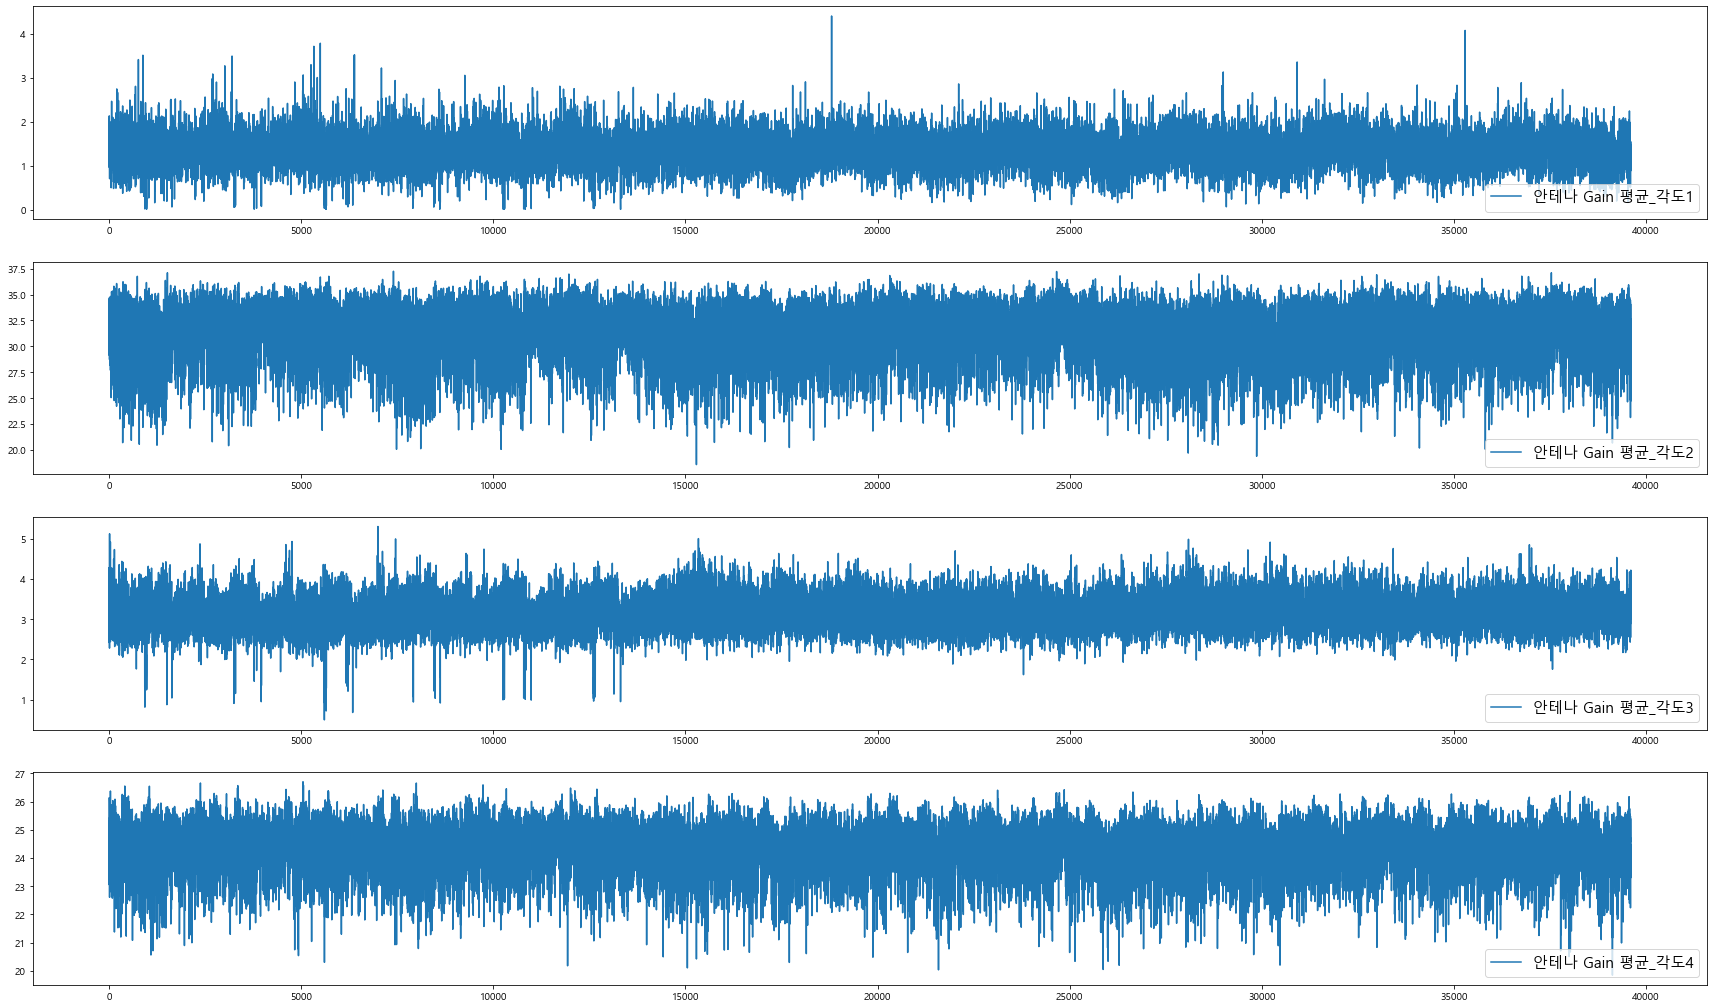

In [40]:
# Y : 안테나 Gain 평균(각도 1~4)
fig, axes = plt.subplots(4, 1, figsize=(30,18))
ax = axes.flatten()
plt.subplots_adjust()

ax[0].plot(train_y['Y_01'], label='안테나 Gain 평균_각도1')
ax[0].legend(loc='lower right', fontsize=15)
ax[1].plot(train_y['Y_05'], label='안테나 Gain 평균_각도2')
ax[1].legend(loc='lower right', fontsize=15)
ax[2].plot(train_y['Y_07'], label='안테나 Gain 평균_각도3')
ax[2].legend(loc='lower right', fontsize=15)
ax[3].plot(train_y['Y_11'], label='안테나 Gain 평균_각도4')
ax[3].legend(loc='lower right', fontsize=15)

plt.show()

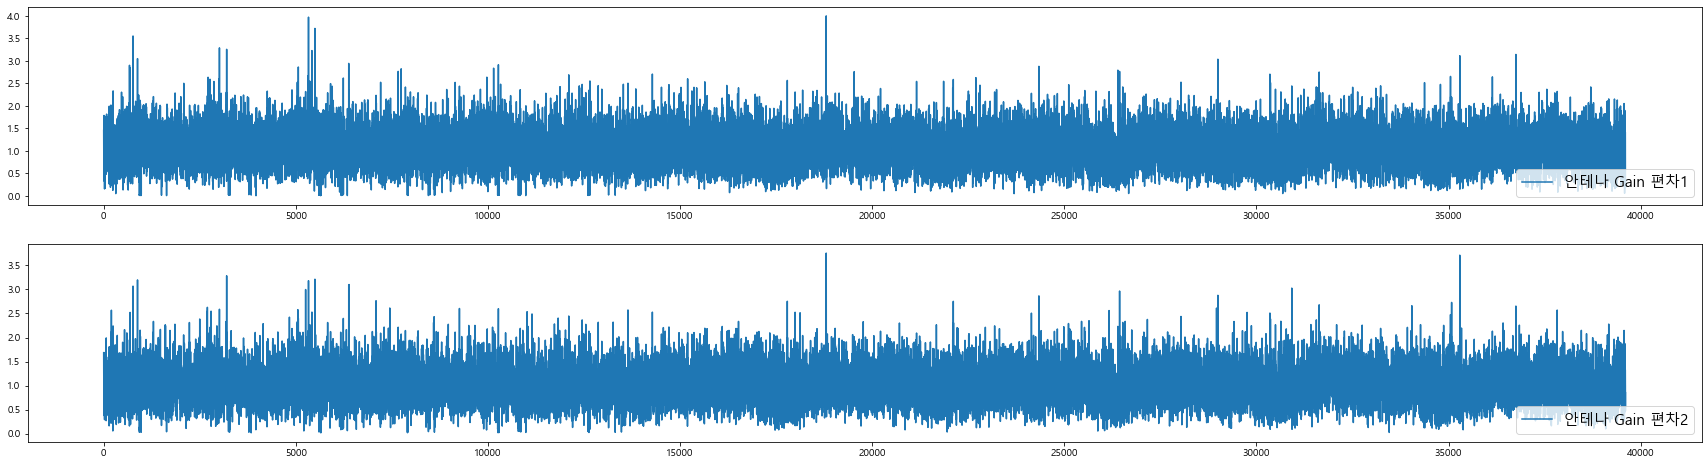

In [41]:
# Y : 안테나 Gain 편차 1,2
fig, axes = plt.subplots(2, 1, figsize=(30,8))
ax = axes.flatten()
plt.subplots_adjust()

ax[0].plot(train_y['Y_02'], label='안테나 Gain 편차1')
ax[0].legend(loc='lower right', fontsize=15)
ax[1].plot(train_y['Y_03'], label='안테나 Gain 편차2')
ax[1].legend(loc='lower right', fontsize=15)


plt.show()

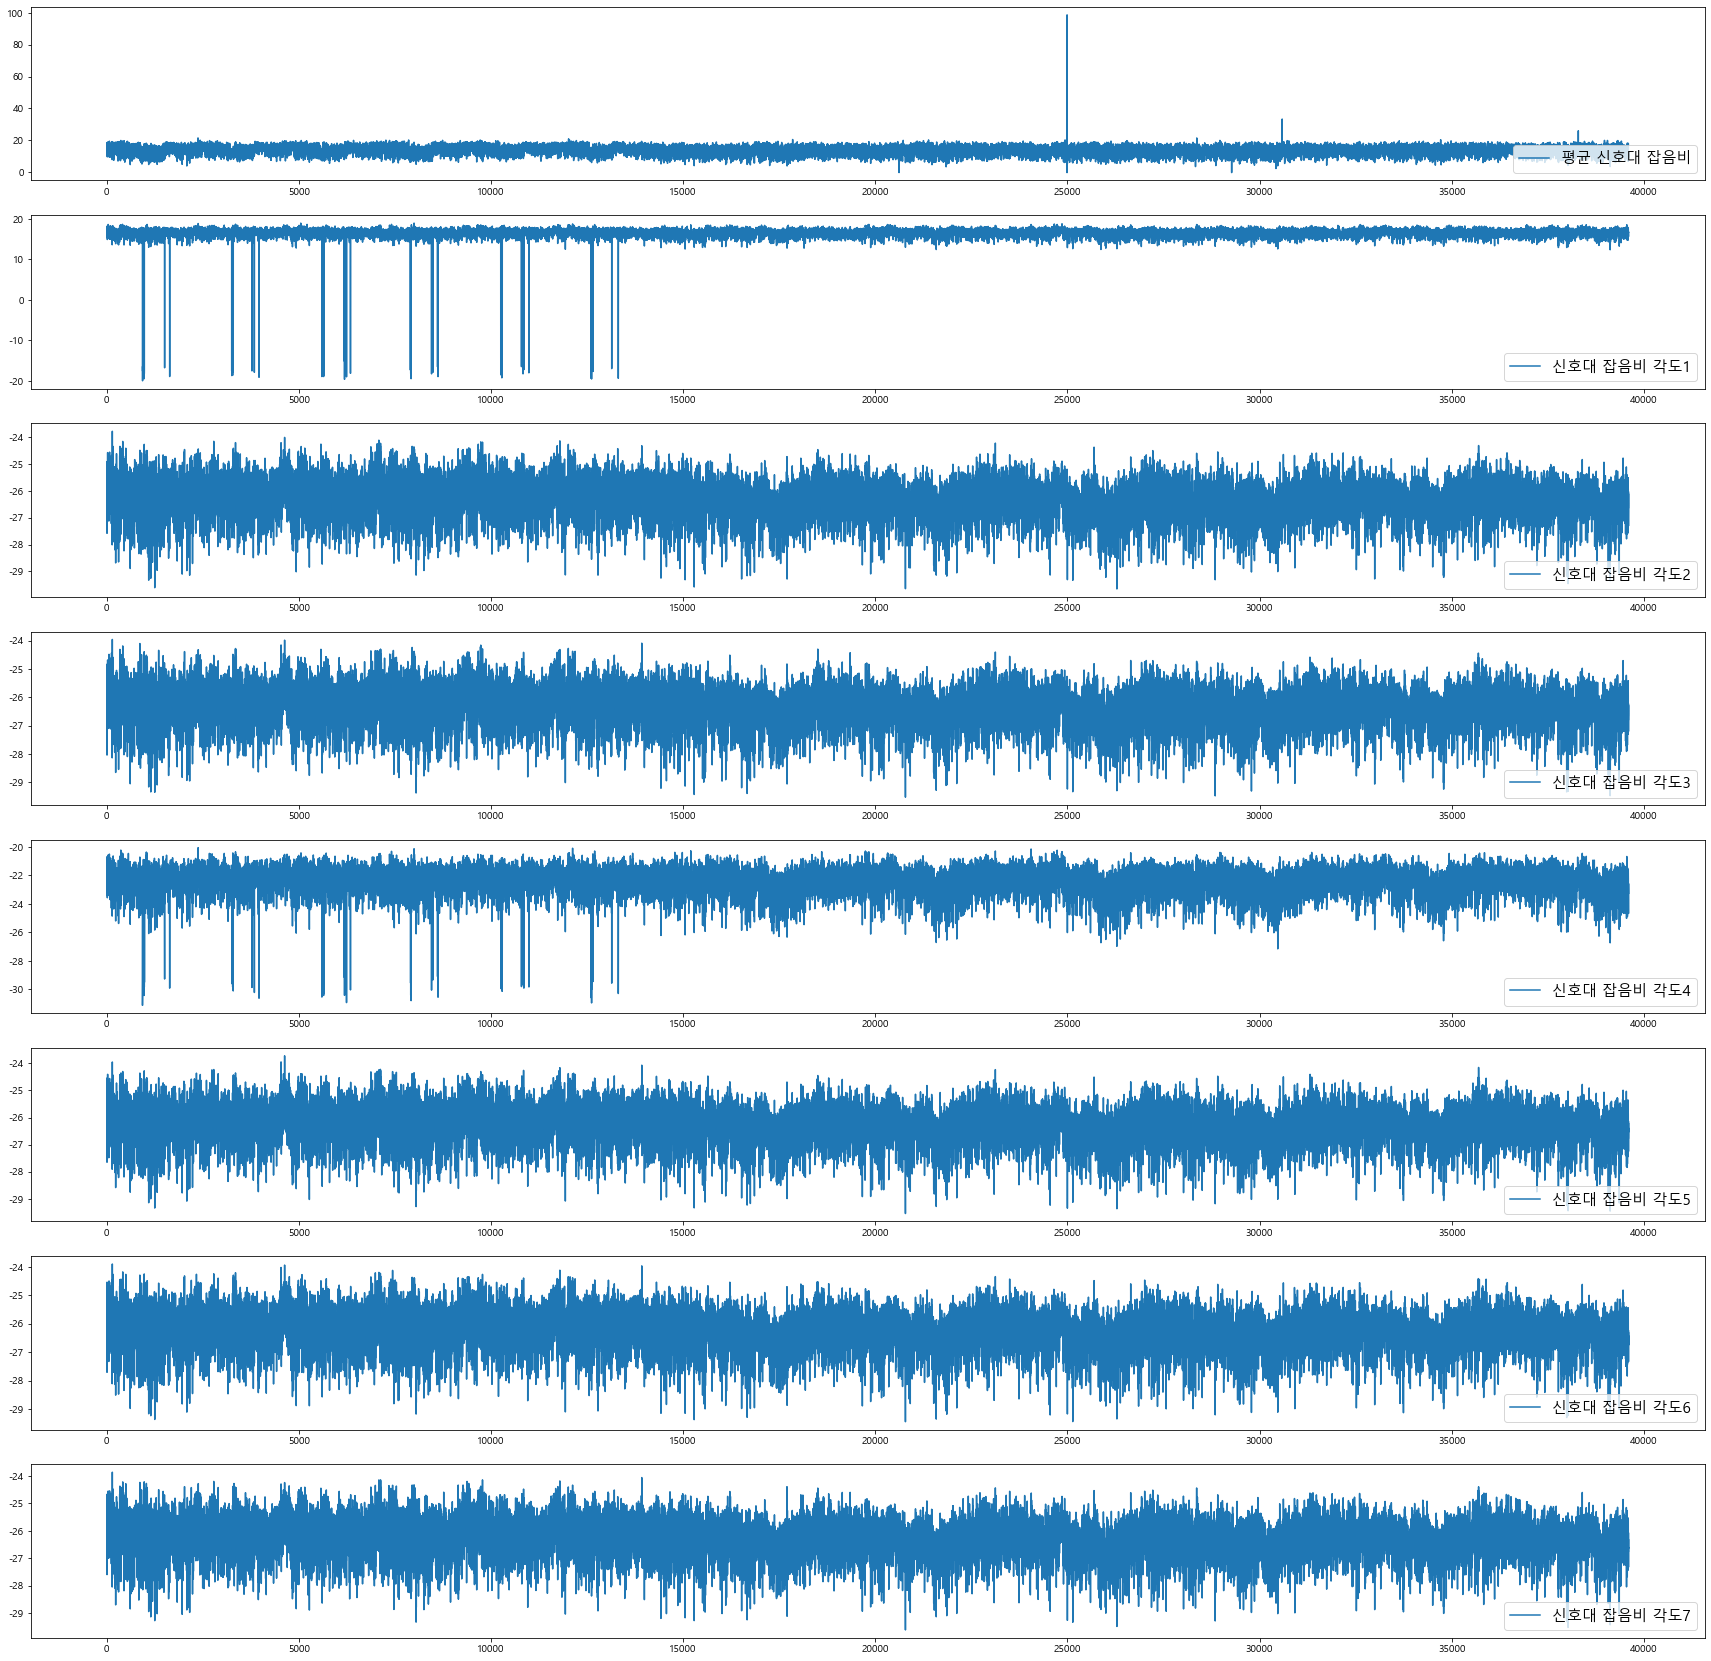

In [38]:
# Y : 신호대 잡음비 (평균, 각도 1~7)
fig, axes = plt.subplots(8, 1, figsize=(30,30))
ax = axes.flatten()
plt.subplots_adjust()

ax[0].plot(train_y['Y_04'], label='평균 신호대 잡음비')
ax[0].legend(loc='lower right', fontsize=15)
ax[1].plot(train_y['Y_06'], label='신호대 잡음비 각도1')
ax[1].legend(loc='lower right', fontsize=15)
ax[2].plot(train_y['Y_08'], label='신호대 잡음비 각도2')
ax[2].legend(loc='lower right', fontsize=15)
ax[3].plot(train_y['Y_09'], label='신호대 잡음비 각도3')
ax[3].legend(loc='lower right', fontsize=15)
ax[4].plot(train_y['Y_10'], label='신호대 잡음비 각도4')
ax[4].legend(loc='lower right', fontsize=15)
ax[5].plot(train_y['Y_12'], label='신호대 잡음비 각도5')
ax[5].legend(loc='lower right', fontsize=15)
ax[6].plot(train_y['Y_13'], label='신호대 잡음비 각도6')
ax[6].legend(loc='lower right', fontsize=15)
ax[7].plot(train_y['Y_14'], label='신호대 잡음비 각도7')
ax[7].legend(loc='lower right', fontsize=15)

plt.show()